<a href="https://colab.research.google.com/github/NLawrenz/master-thesis/blob/master/Data_Sim_Master_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

# 1D Simulation



In [3]:
mu1 = 0
variance1 = 1
sigma1 = math.sqrt(variance1)
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
y1 =stats.norm.pdf(x1, mu1, sigma1)


In [4]:
mu2 = 4
variance2 = 2
sigma2 = math.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
y2 = stats.norm.pdf(x2, mu2, sigma2)

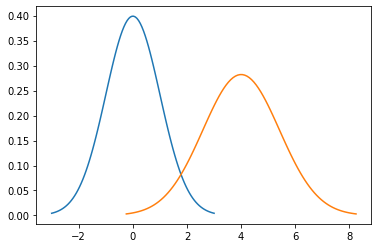

In [5]:
f, ax = plt.subplots(1)
ax.plot(x1, y1)
ax.plot(x2, y2)

Population 1 ~ $\mathcal N(0,1), n_1 = 10000$   
Population 2 ~ $\mathcal N(4,4), n_2 = 10000$

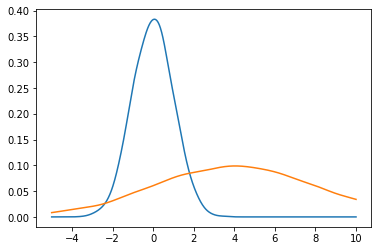

In [6]:

random.seed(42)
from scipy.stats import gaussian_kde

n1 = 10000
x1_sim =  np.random.normal(loc = 0, scale = 1, size = n1)
y1 = np.ones(n1)
density = gaussian_kde(x1_sim)
xs = np.linspace(-5, 10,1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))



n2 = n1
x2_sim = np.random.normal(4,4,n2)
y2 = np.zeros(n2)
density = gaussian_kde(x2_sim)
xs = np.linspace(-5, 10,1000)
#density.covariance_factor = lambda : .25
#density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [7]:
data1 = pd.DataFrame({"x":x1_sim, "y":y1})
data2 = pd.DataFrame({"x":x2_sim, "y":y2})

In [8]:
data = pd.concat([data1, data2], sort=False)

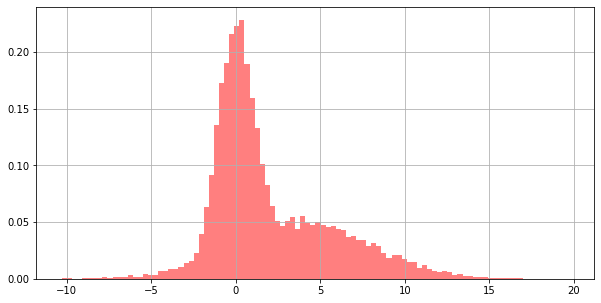

In [9]:
plt.figure(figsize=(10,5))
data["x"].hist(bins = 100, alpha = 0.5, color = 'red',density = True)

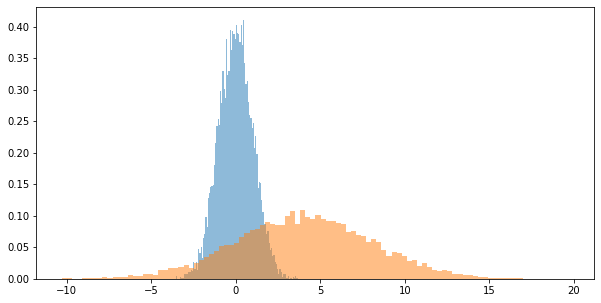

In [10]:
plt.figure(figsize=(10,5))
plt.hist(data1["x"], bins=100, alpha=0.5, label="data1",density = True, stacked = True)
plt.hist(data2["x"], bins=100, alpha=0.5, label="data2",density = True, stacked = True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data["x"], data["y"], test_size=0.4, random_state = 42)

x_train = x_train.array.reshape(-1,1)
x_test = x_test.array.reshape(-1,1)


In [13]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (12000, 1)
y_train:  (12000,)
x_test:  (8000, 1)
y_test:  (8000,)


In [14]:
from sklearn.linear_model import LogisticRegressionCV

logregCV = LogisticRegressionCV(cv = 10, random_state = 42).fit(x_train, y_train)

y_pred = logregCV.predict(x_test)

In [15]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2823, 1151],
       [ 171, 3855]])

In [16]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      3974
           1       0.77      0.96      0.85      4026

    accuracy                           0.83      8000
   macro avg       0.86      0.83      0.83      8000
weighted avg       0.86      0.83      0.83      8000



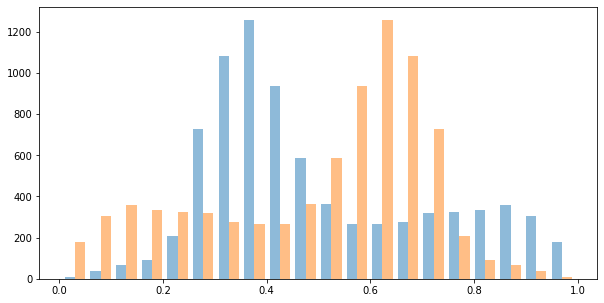

In [17]:
plt.figure(figsize=(10,5))
plt.hist(logregCV.predict_proba(x_test),bins = 20, alpha = 0.5)
plt.show()

In [18]:
print(logregCV.coef_)
print(logregCV.intercept_)
coef = logregCV.coef_
intercept = logregCV.intercept_

[[-0.30809699]]
[0.53787815]


In [19]:
logregCV.predict_proba(np.array([1.77]).reshape(-1,1))

array([[0.50186337, 0.49813663]])

In [20]:
logregCV.predict(np.array([1.77]).reshape(-1,1))

array([0.])

In [21]:
logregCV.predict(np.array([1.78]).reshape(-1,1))

array([0.])

In [22]:
def logfun(x):
    return 1/(1+np.exp(-intercept+coef*x))


In [23]:
lin = np.linspace(-20,20, 1000)
ab = logfun(lin)
ab = ab.reshape(-1,1)


<function matplotlib.pyplot.show(*args, **kw)>

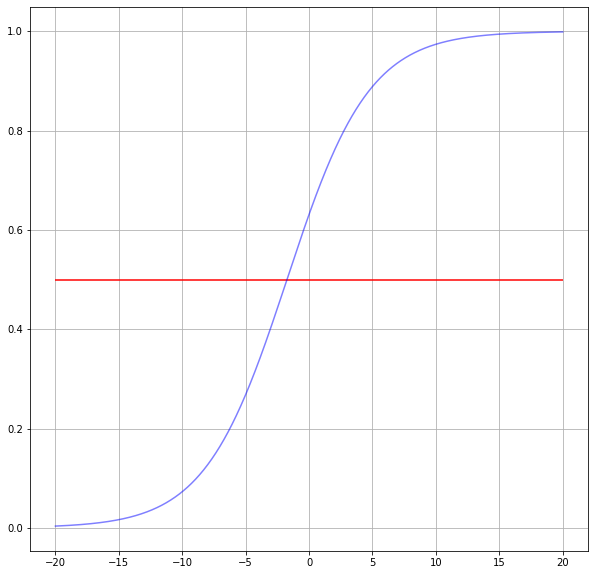

In [39]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(lin,ab, color = 'blue', alpha = 0.5)
plt.hlines(0.5,-20,20, color = 'red')
plt.show

In [40]:
from sklearn import svm

In [45]:
clf = svm.NuSVC(gamma="auto", probability = True)
clf.fit(x_train, y_train)

NuSVC(gamma='auto', probability=True)

In [46]:
y_pred = clf.predict(x_test)

In [47]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      3974
           1       0.80      0.94      0.87      4026

    accuracy                           0.86      8000
   macro avg       0.87      0.86      0.85      8000
weighted avg       0.87      0.86      0.86      8000



# 2D Simulation